# Perkenalan

Nama : Rizqi Golda

Batch : FTDS-018-RMT

Dataset : bigquery-public-data.ml_datasets.credit_card_default

Objective : Menurut laporan dari `Surti Risanti` di (https://www.fortuneidn.com/finance/surti/skor-kredit-yang-bagus?page=all), ada beberapa kondisi yang mempengaruhi skor kredit. skor kredit adalah sebuah angka yang merefleksikan seberapa baik seseorang dalam mengelola kewajiban keuangannya, seperti tagihan kartu kredit, pinjaman, dan pembayaran cicilan. Skor kredit digunakan oleh lembaga keuangan, seperti bank atau kreditur, untuk menilai risiko kredit seseorang, yaitu kemungkinan seseorang untuk membayar kembali utang mereka tepat waktu. dengan dataset yang saya miliki, maka saya akan mencoba membuat model untuk mengetahui apakah orang tersebut gagal bayar agunan atau tidak.

# Import Library

memasukkan semua library yang diperlukan selama proses `machine learning`

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
import pickle
import json

# SQL query

memasukkan semua query sql yang digunakan untuk mengambil dataset

SELECT 

    limit_balance, 

    CAST (sex AS INT64) AS sex, 

    CAST (education_level AS INT64) AS education_level, 

    CAST (marital_status AS INT64) AS marital_status, 

    age, 

    pay_0, 

    pay_2, 

    pay_3, 

    pay_4, 

    CAST (pay_5 AS FLOAT64) as pay_5,

    CAST (pay_6 AS FLOAT64) as pay_6, 

    bill_amt_1, 

    bill_amt_2, 
    
    bill_amt_3, 
    
    bill_amt_4, 
    
    bill_amt_5, 
    
    bill_amt_6, 
    
    pay_amt_1, 
    
    pay_amt_2, 
    
    pay_amt_3, 
    
    pay_amt_4, 
    
    pay_amt_5, 
    
    pay_amt_6, 
    
    CAST (default_payment_next_month AS INT64) as default_payment_next_month

FROM 

    bigquery-public-data.ml_datasets.credit_card_default

LIMIT

    36090

# Data loading

mengambil data yang diperlukan dari `bigquery-public-data.ml_datasets.credit_card_default` yang telah disimpan di lokal dalam bentuk `csv`

In [3]:
dataSheet = pd.read_csv('file:///home/ubuntu/Downloads/ml01f01_dataset.csv')
dataSheet

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
0,80000.0,1,6,1,54.0,0.0,0.0,0.0,0.0,0.0,...,29296.0,26210.0,17643.0,2545.0,2208.0,1336.0,2232.0,542.0,348.0,1
1,200000.0,1,4,1,49.0,0.0,0.0,0.0,0.0,0.0,...,50146.0,50235.0,48984.0,1689.0,2164.0,2500.0,3480.0,2500.0,3000.0,0
2,20000.0,2,6,2,22.0,0.0,0.0,0.0,0.0,0.0,...,1434.0,500.0,0.0,4641.0,1019.0,900.0,0.0,1500.0,0.0,1
3,260000.0,2,4,2,33.0,0.0,0.0,0.0,0.0,0.0,...,27821.0,30767.0,29890.0,5000.0,5000.0,1137.0,5000.0,1085.0,5000.0,0
4,150000.0,1,4,2,32.0,0.0,0.0,0.0,-1.0,0.0,...,150464.0,143375.0,146411.0,4019.0,146896.0,157436.0,4600.0,4709.0,5600.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2960,80000.0,2,3,2,28.0,-1.0,-1.0,-1.0,-2.0,-2.0,...,0.0,0.0,0.0,2800.0,0.0,0.0,0.0,0.0,0.0,0
2961,50000.0,2,3,1,51.0,-1.0,-1.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,300.0,5880.0,0.0,0.0,0.0,0.0,1
2962,450000.0,2,2,1,38.0,-2.0,-2.0,-2.0,-2.0,-2.0,...,390.0,390.0,390.0,390.0,780.0,390.0,390.0,390.0,390.0,1
2963,50000.0,2,2,1,44.0,-2.0,-2.0,-2.0,-2.0,-2.0,...,390.0,390.0,0.0,390.0,390.0,390.0,390.0,0.0,780.0,0


melihat 10 data teratas.

In [4]:
dataSheet.head(10)

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
0,80000.0,1,6,1,54.0,0.0,0.0,0.0,0.0,0.0,...,29296.0,26210.0,17643.0,2545.0,2208.0,1336.0,2232.0,542.0,348.0,1
1,200000.0,1,4,1,49.0,0.0,0.0,0.0,0.0,0.0,...,50146.0,50235.0,48984.0,1689.0,2164.0,2500.0,3480.0,2500.0,3000.0,0
2,20000.0,2,6,2,22.0,0.0,0.0,0.0,0.0,0.0,...,1434.0,500.0,0.0,4641.0,1019.0,900.0,0.0,1500.0,0.0,1
3,260000.0,2,4,2,33.0,0.0,0.0,0.0,0.0,0.0,...,27821.0,30767.0,29890.0,5000.0,5000.0,1137.0,5000.0,1085.0,5000.0,0
4,150000.0,1,4,2,32.0,0.0,0.0,0.0,-1.0,0.0,...,150464.0,143375.0,146411.0,4019.0,146896.0,157436.0,4600.0,4709.0,5600.0,0
5,300000.0,2,4,2,32.0,0.0,0.0,0.0,0.0,0.0,...,65150.0,-450.0,700.0,15235.0,1491.0,1303.0,0.0,2000.0,1400.0,0
6,130000.0,1,1,1,45.0,0.0,0.0,0.0,0.0,0.0,...,62377.0,63832.0,65099.0,2886.0,2908.0,2129.0,2354.0,2366.0,2291.0,0
7,200000.0,1,1,1,58.0,0.0,0.0,0.0,0.0,0.0,...,124647.0,126921.0,129167.0,7822.0,4417.0,4446.0,4597.0,4677.0,4698.0,0
8,500000.0,1,1,1,39.0,0.0,0.0,0.0,0.0,0.0,...,174500.0,137406.0,204975.0,54209.0,4607.0,4603.0,5224.0,207440.0,7509.0,0
9,230000.0,1,1,1,48.0,0.0,0.0,0.0,0.0,0.0,...,105508.0,108101.0,110094.0,7000.0,6607.0,3773.0,4290.0,4164.0,2000.0,0


melihat 10 data terakhir

In [5]:
dataSheet.tail(10)

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
2955,360000.0,2,2,2,26.0,-1.0,-1.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,463.0,2500.0,0.0,0.0,0.0,0.0,0
2956,100000.0,1,3,1,40.0,0.0,0.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,2000.0,2377.0,40000.0,0.0,0.0,0.0,0
2957,30000.0,2,3,1,48.0,1.0,-1.0,-1.0,-2.0,-2.0,...,0.0,0.0,0.0,200.0,0.0,0.0,0.0,0.0,0.0,0
2958,80000.0,2,3,1,39.0,-1.0,-1.0,-1.0,-1.0,-2.0,...,0.0,0.0,5000.0,5000.0,5000.0,0.0,5000.0,5000.0,470.0,0
2959,20000.0,1,3,2,26.0,-1.0,-1.0,-1.0,-2.0,-2.0,...,0.0,0.0,0.0,1560.0,0.0,0.0,0.0,0.0,0.0,0
2960,80000.0,2,3,2,28.0,-1.0,-1.0,-1.0,-2.0,-2.0,...,0.0,0.0,0.0,2800.0,0.0,0.0,0.0,0.0,0.0,0
2961,50000.0,2,3,1,51.0,-1.0,-1.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,300.0,5880.0,0.0,0.0,0.0,0.0,1
2962,450000.0,2,2,1,38.0,-2.0,-2.0,-2.0,-2.0,-2.0,...,390.0,390.0,390.0,390.0,780.0,390.0,390.0,390.0,390.0,1
2963,50000.0,2,2,1,44.0,-2.0,-2.0,-2.0,-2.0,-2.0,...,390.0,390.0,0.0,390.0,390.0,390.0,390.0,0.0,780.0,0
2964,290000.0,2,2,1,39.0,1.0,-2.0,-2.0,-2.0,-2.0,...,3184.0,390.0,390.0,10000.0,800.0,3184.0,390.0,390.0,6617.0,0


melihat informasi sederhana dari datasheet yang dipunya

In [6]:
dataSheet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2965 entries, 0 to 2964
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   limit_balance               2965 non-null   float64
 1   sex                         2965 non-null   int64  
 2   education_level             2965 non-null   int64  
 3   marital_status              2965 non-null   int64  
 4   age                         2965 non-null   float64
 5   pay_0                       2965 non-null   float64
 6   pay_2                       2965 non-null   float64
 7   pay_3                       2965 non-null   float64
 8   pay_4                       2965 non-null   float64
 9   pay_5                       2965 non-null   float64
 10  pay_6                       2965 non-null   float64
 11  bill_amt_1                  2965 non-null   float64
 12  bill_amt_2                  2965 non-null   float64
 13  bill_amt_3                  2965 

Diketahui dari informasi di atas terdapat 23 kolom dengan 2965 baris data di dalam dataframe

mengecek informasi sederhana dari datasheet tersebut.

In [7]:
dataSheet.describe()

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
count,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,...,2965.000000,2965.000000,2965.000000,2965.000000,2.965000e+03,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000
mean,163369.308600,1.607757,1.849578,1.559865,35.193255,0.005059,-0.122428,-0.141653,-0.185160,-0.225295,...,44089.683305,40956.080607,39773.072513,6348.902867,6.272494e+03,5150.497133,4561.376054,4913.286678,5382.701518,0.214165
std,125030.415472,0.488333,0.778184,0.522317,9.109439,1.114395,1.180784,1.183630,1.178322,1.159003,...,61907.454056,58271.904751,57303.488981,20885.735336,2.887967e+04,14287.079982,13281.499599,16734.340778,17275.953029,0.410311
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-46627.000000,-46627.000000,-73895.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2582.000000,1958.000000,1430.000000,1013.000000,9.900000e+02,477.000000,313.000000,323.000000,173.000000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19894.000000,18814.000000,18508.000000,2234.000000,2.175000e+03,1994.000000,1600.000000,1646.000000,1615.000000,0.000000
75%,230000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,58622.000000,53373.000000,52287.000000,5087.000000,5.000000e+03,4500.000000,4000.000000,4021.000000,4081.000000,0.000000
max,800000.000000,2.000000,6.000000,3.000000,69.000000,8.000000,7.000000,7.000000,8.000000,7.000000,...,488808.000000,441981.000000,436172.000000,493358.000000,1.227082e+06,199209.000000,202076.000000,388071.000000,403500.000000,1.000000


# Exploratory Data Analysis (EDA)

In [8]:
def plot_bar(groupby_column):
    dataSheet_1 =dataSheet.groupby(groupby_column).size().reset_index(name="counts")
    fig1 = px.bar(data_frame=dataSheet_1, x=groupby_column, y="counts", color=groupby_column, barmode="group")
    print(dataSheet_1)
    fig1.show()

Membuat fungsi untuk melihat persebaran data dengan visualisasi bar plot

In [9]:
plot_bar('default_payment_next_month')

   default_payment_next_month  counts
0                           0    2330
1                           1     635


Dari Data di atas dapat kita lihat persebaran data untuk kolom gagal bayar yaitu hanya ada 2 data yaitu nasabah yang tidak gagal bayar berjumlah 2330 dan nasabah yang mengalami gagal bayar sebesar 635.

In [10]:
plot_bar('pay_0')

    pay_0  counts
0    -2.0     247
1    -1.0     540
2     0.0    1516
3     1.0     356
4     2.0     262
5     3.0      29
6     4.0       7
7     5.0       2
8     6.0       1
9     7.0       2
10    8.0       3


Dari Data di atas dapat kita lihat persebaran data untuk kolom `pay_0` terdapat beberapa kondisi, dengan kondisi `0` memiliki jumlah tertinggi mencapai 1516 nasabah.

In [11]:
plot_bar('age')

     age  counts
0   21.0       7
1   22.0      49
2   23.0      95
3   24.0     120
4   25.0     119
5   26.0     138
6   27.0     146
7   28.0     138
8   29.0     149
9   30.0     171
10  31.0     122
11  32.0     119
12  33.0     104
13  34.0     122
14  35.0     104
15  36.0     114
16  37.0      99
17  38.0      90
18  39.0      90
19  40.0      86
20  41.0      99
21  42.0      79
22  43.0      68
23  44.0      44
24  45.0      55
25  46.0      48
26  47.0      54
27  48.0      41
28  49.0      41
29  50.0      38
30  51.0      25
31  52.0      37
32  53.0      30
33  54.0      16
34  55.0      30
35  56.0      19
36  57.0      10
37  58.0       9
38  59.0       4
39  60.0       7
40  61.0      10
41  62.0       4
42  63.0       4
43  64.0       1
44  65.0       3
45  66.0       2
46  67.0       2
47  68.0       1
48  69.0       2


Dari Data di atas dapat kita lihat persebaran data untuk kolom usia, untuk usia nasabah terbanyak ada di usia 30 tahun dengan banyak nasabah 171. nasabah tertua tercatat pada data di atas yaitu 69 tahun serta usia termuda di usia 21 tahun. 

# Features Enginering

In [12]:
df = dataSheet.copy()

men-duplikat datasheet supaya datanya tidak rusak selama kegiatan berlangsung

## split data train dan test

In [13]:
train, test = train_test_split(df, test_size=0.2, random_state=2)

print('Train Size : ', train.shape)
print('Test Size  : ', test.shape)
train

Train Size :  (2372, 24)
Test Size  :  (593, 24)


,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
418,300000.0,1,2,1,41.0,0.0,0.0,0.0,0.0,0.0,...,64482.0,100558.0,76056.0,5505.0,5000.0,3000.0,95000.0,4000.0,3500.0,0
1294,100000.0,1,3,2,36.0,2.0,0.0,0.0,0.0,0.0,...,44728.0,49192.0,51391.0,4400.0,1028.0,3120.0,6218.0,4016.0,4536.0,0
2629,100000.0,1,2,2,30.0,-2.0,-2.0,-2.0,-2.0,-2.0,...,0.0,1756.0,0.0,1475.0,0.0,0.0,1756.0,0.0,0.0,0
1235,20000.0,2,3,1,56.0,0.0,0.0,0.0,0.0,0.0,...,15512.0,17081.0,21108.0,2009.0,2000.0,2000.0,2000.0,5016.0,11.0,0
663,210000.0,2,2,1,44.0,0.0,0.0,0.0,0.0,0.0,...,70660.0,71172.0,71844.0,4500.0,3600.0,3100.0,2900.0,2600.0,2700.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2514,360000.0,1,1,1,38.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,390.0,390.0,390.0,0.0,390.0,390.0,390.0,390.0,390.0,1
2347,110000.0,2,2,2,26.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,922.0,3509.0,1979.0,400.0,300.0,922.0,3509.0,0.0,5192.0,1
1608,40000.0,2,2,1,39.0,-1.0,-1.0,-1.0,0.0,0.0,...,19353.0,19440.0,20279.0,0.0,18583.0,1460.0,547.0,1000.0,500.0,0
2541,320000.0,1,1,1,45.0,-2.0,-2.0,-2.0,-2.0,-2.0,...,9198.0,2314.0,14497.0,21903.0,10832.0,9244.0,2325.0,14568.0,29249.0,0


Melakukan split terhadap data train dan data test, dengan komposisi 0.2 atau 80/20% dari data frame.

## melihat apa ada missing value pada data latihan

memastikan tidak ada missing value pada data latihan

In [14]:
train.isnull().mean()

limit_balance                 0.0
sex                           0.0
education_level               0.0
marital_status                0.0
age                           0.0
pay_0                         0.0
pay_2                         0.0
pay_3                         0.0
pay_4                         0.0
pay_5                         0.0
pay_6                         0.0
bill_amt_1                    0.0
bill_amt_2                    0.0
bill_amt_3                    0.0
bill_amt_4                    0.0
bill_amt_5                    0.0
bill_amt_6                    0.0
pay_amt_1                     0.0
pay_amt_2                     0.0
pay_amt_3                     0.0
pay_amt_4                     0.0
pay_amt_5                     0.0
pay_amt_6                     0.0
default_payment_next_month    0.0
dtype: float64

dari hasil yang diberikan diatas, tidak ditemukan data yang hilang pada data latihan.

bila terdapat adanya data yang hilang di data latihan, maka perlu dihapus baris datanya.

In [15]:
train_clean = train.dropna()

## outlier data latihan

melakukan aksi yang perlu dilakukan bila terdapat data yang jelek persebarannya sehingga data yang digunakan untuk latihan baik persebarannya.

### cek outlier

#### bill_amt_1

mengecek akan adanya outlier pada data latihan di kolom `bill_amt_1` yang kita punya.

Text(0.5, 1.0, 'Boxplot')

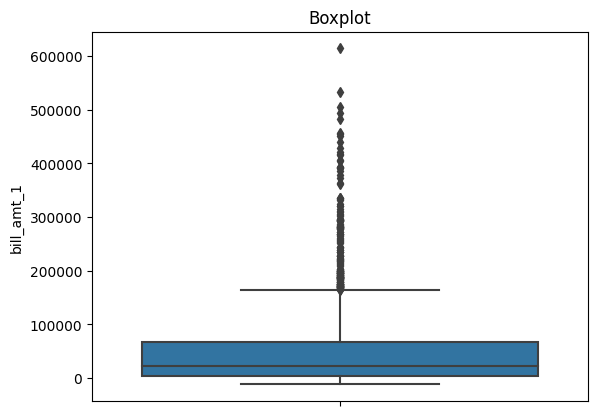

In [16]:
sns.boxplot(y=train['bill_amt_1'])
plt.title('Boxplot')

melihat `boxplot` dari kolom `bill_amt_1`. Boxplot atau Box-Plot merupakan visualisasi data berbentuk box (kotak berbentuk bujur sangkar). Boxplot dapat digunakan untuk menunjukkan perbedaan antara populasi tanpa menggunakan asumsi distribusi statistik yang mendasarinya. dari tabel diatas, diketahui terdapat beberapa data dari kolom `education_num` yang bertepatan diatas nilai yang telah ditentukan.

In [17]:
train['bill_amt_1'].skew()

2.657055179541352

melihat kemiringan dari kolom `bill_amt_1`, `skewness` merupakan ukuran ketidaksimetrisan dalam penyebaran data. jadi, dapat diartikan `skewness` yang bernilai positif lebih dari 0 akan membuat ekor dari persebaran datanya condong lebih panjang kekanan serta bila bernilai negatif atau kurang dari 0 maka akan membuat ekor dari persebaran datanya condong lebih panjang ke kanan. bila diartikan dalam tabel berikut, maka kesimpulan yang didapatkan ialah "persebaran data `bill_amt_1` pada datasheet yang diatas memiliki catatan bahwa terdapat nasabah yang memiliki `bill_amt_1` diatas `outlier` yang telah ditentukan.

#### pay_amt_1

mengecek akan adanya outlier pada data latihan di kolom `pay_amt_1` yang kita punya.

Text(0.5, 1.0, 'Boxplot')

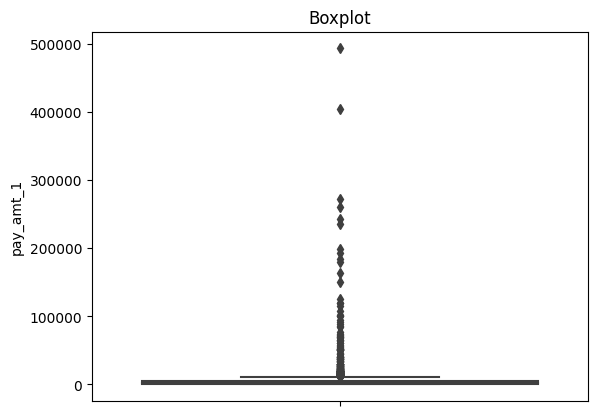

In [18]:
sns.boxplot(y=train['pay_amt_1'])
plt.title('Boxplot')

melihat `boxplot` dari kolom `pay_amt_1`. Boxplot atau Box-Plot merupakan visualisasi data berbentuk box (kotak berbentuk bujur sangkar). Boxplot dapat digunakan untuk menunjukkan perbedaan antara populasi tanpa menggunakan asumsi distribusi statistik yang mendasarinya. dari tabel diatas, diketahui terdapat beberapa data dari kolom `pay_amt_1` yang bertepatan diatas nilai yang telah ditentukan.

In [19]:
train['pay_amt_1'].skew()

12.122729522696607

melihat kemiringan dari kolom `pay_amt_1`, `skewness` merupakan ukuran ketidaksimetrisan dalam penyebaran data. jadi, dapat diartikan `skewness` yang bernilai positif lebih dari 0 akan membuat ekor dari persebaran datanya condong lebih panjang kekanan serta bila bernilai negatif atau kurang dari 0 maka akan membuat ekor dari persebaran datanya condong lebih panjang ke kanan. bila diartikan dalam tabel berikut, maka kesimpulan yang didapatkan ialah "persebaran data `pay_amt_1` pada datasheet yang diatas memiliki catatan bahwa terdapat nasabah yang memiliki `pay_amt_1` diatas `outlier` yang telah ditentukan.

#### insight outlier

saya berasumsi, setiap datasheet yang telah dipilih merupakan data yang bila mana data tersebut memiliki `outlier` maka `outlier` tersebut dikategorikan sebagai `natural outlier`. dikarenakan `natural outlier` itu merupakan data yang benar, maka tidak perlu dilakukan pembersihan maupun manipulasi pada datasheet diatas.

## split data input dan output

In [20]:
X_train = train.drop(['default_payment_next_month'], axis=1)
X_test = test.drop(['default_payment_next_month'], axis=1)

y_train = train['default_payment_next_month']
y_test = test['default_payment_next_month']

data `default_payment_next_month` akan saya jadikan `output`, dan sisanya akan saya jadikan sebagai `input` nya

## split data numerical dan data categorical

In [21]:
X_num = ['limit_balance', 'age', 'bill_amt_1', 'bill_amt_2', 'bill_amt_3', 'bill_amt_4', 'bill_amt_5', 'bill_amt_6', 'pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5', 'pay_amt_6']
X_cat_OHE = ['sex', 'marital_status', 'education_level']
X_cat_OE = ['pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']


data `numerik` terdiri dari `limit_balance', 'age', 'bill_amt_1', 'bill_amt_2', 'bill_amt_3', 'bill_amt_4', 'bill_amt_5', 'bill_amt_6', 'pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5', 'pay_amt_6'`, data kategori untuk `encode` dengan metode `onehotencoder` terdiri dari `'sex', 'marital_status', 'education_level'` dan data kategori untuk `encode` dengan metode `ordinalencoder` terdiri dari `'pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6'`

In [22]:
X_train_num = X_train[X_num]
X_test_num = X_test[X_num]

X_train_cat_OHE = X_train[X_cat_OHE]
X_test_cat_OHE = X_test[X_cat_OHE]

X_train_cat_OE = X_train[X_cat_OE]
X_test_cat_OE = X_test[X_cat_OE]

memasukkan data yang telah dikelompokkan kedalam data latihan dan data tes

## encoding

melakukan `encoding` pada `data kategori` guna dapat dihitung dengan `maching learning`

### onehotencoder

In [23]:
encoder = OneHotEncoder()

encoder.fit(X_train_cat_OHE)

X_train_cat_encoded = encoder.transform(X_train_cat_OHE).toarray()
X_test_cat_encoded = encoder.transform(X_test_cat_OHE).toarray()


saya menggunakan metode `onehotencoder` dikarenakan tidak adanya ranking pada setiap kolom kategorinya.

### ordinalencoder

In [24]:
encoder_2 = OrdinalEncoder(categories=[[-2,-1,0,1,2,3,4,5,6,7,8],
                                       [-2,-1,0,1,2,3,4,5,6,7,8],
                                       [-2,-1,0,1,2,3,4,5,6,7,8],
                                       [-2,-1,0,1,2,3,4,5,6,7,8],
                                       [-2,-1,0,1,2,3,4,5,6,7,8],
                                       [-2,-1,0,1,2,3,4,5,6,7,8]
                                       ])

encoder_2.fit(X_train_cat_OE)

X_train_cat_encoded_2 = encoder_2.transform(X_train_cat_OE)
X_test_cat_encoded_2 = encoder_2.transform(X_test_cat_OE)

saya menggunakan metode `ordinalencoder` dikarenakan adanya ranking pada setiap kolom kategorinya.

## scaling

In [25]:
scaler = MinMaxScaler()
scaler.fit(X_train_num)

X_train_num_scaled = scaler.transform(X_train_num)
X_test_num_scaled = scaler.transform(X_test_num)

saya menggunakan metode `minmaxscaller` dalam *scaling* di data numerik dikarenakan adanya skewness pada data yang diperoleh.

## concate

menggabungkan semua `data kategori` dan `data numerikal` pada `data latihan` dan `data tes`

In [26]:
X_train_final = np.concatenate([X_train_num_scaled, X_train_cat_encoded, X_train_cat_encoded_2], axis=1)
X_test_final = np.concatenate([X_test_num_scaled, X_test_cat_encoded, X_test_cat_encoded_2], axis=1)
X_train_final

array([[0.36708861, 0.41666667, 0.27914391, ..., 2.        , 2.        ,
        2.        ],
       [0.11392405, 0.3125    , 0.0800937 , ..., 2.        , 2.        ,
        4.        ],
       [0.11392405, 0.1875    , 0.01992149, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.03797468, 0.375     , 0.01925952, ..., 2.        , 2.        ,
        2.        ],
       [0.39240506, 0.5       , 0.07819893, ..., 0.        , 0.        ,
        0.        ],
       [0.49367089, 0.29166667, 0.02595758, ..., 0.        , 0.        ,
        0.        ]])

# Model Definition

menentukan beberapa tipe `model` yang digunakan pada `maching learing` kali ini

In [27]:
model_log_reg = LogisticRegression()
cls_knn = KNeighborsClassifier()
NaiveBayes = GaussianNB()
tree_reg = DecisionTreeRegressor()
rnd_clf = RandomForestClassifier()
svc_linear = SVC()
MLP = MLPClassifier()


# Model Training

In [28]:
model_log_reg.fit(X_train_final, y_train)
cls_knn.fit(X_train_final, y_train)
NaiveBayes.fit(X_train_final, y_train)
tree_reg.fit(X_train_final, y_train)
rnd_clf.fit(X_train_final, y_train)
svc_linear.fit(X_train_final, y_train)
MLP.fit(X_train_final, y_train)

/home/ubuntu/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/home/ubuntu/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



MLPClassifier()

saya coba melakukan pelatihan pada komputer dengan data yang telah saya sediakan dan metode yang telah disediakan pula.

# Model Evaluation

## Cek model

saya coba mengecek rata-rata f1 yang diperoleh pada setiap model yang saya gunakan. rata-rata f1 tertinggi akan saya jadikan model utama untuk dijalankan pada data ujian.

#### LogisticRegression

mengecek model logistik regresi score latihannya kemudian di cek rata-rata f1 nya.

In [29]:
y_pred_log_reg = model_log_reg.predict(X_train_final)

print("Evaluation: logistik regresi")
print('Training score: {:.4f}'.format(model_log_reg.score(X_train_final, y_train)))

print(classification_report(y_train,y_pred_log_reg))

f1_score_train_cross_val_1 = cross_val_score(model_log_reg, 
                                           X_train_final, 
                                           y_train, 
                                           cv=3, 
                                           scoring='f1')

print('F1 Score - All - Cross Validation  : ', f1_score_train_cross_val_1)
print('F1 Score - Mean - Cross Validation : ', f1_score_train_cross_val_1.mean())
print('F1 Score - Std - Cross Validation  : ', f1_score_train_cross_val_1.std())
print('F1 Score - Range of Test-Set       : ', (f1_score_train_cross_val_1.mean()-f1_score_train_cross_val_1.std()) , '-', (f1_score_train_cross_val_1.mean()+f1_score_train_cross_val_1.std()))

Evaluation: logistik regresi
Training score: 0.8221
              precision    recall  f1-score   support

           0       0.83      0.97      0.90      1865
           1       0.73      0.27      0.39       507

    accuracy                           0.82      2372
   macro avg       0.78      0.62      0.64      2372
weighted avg       0.81      0.82      0.79      2372

F1 Score - All - Cross Validation  :  [0.40350877 0.35497835 0.40343348]
F1 Score - Mean - Cross Validation :  0.3873068677676765
F1 Score - Std - Cross Validation  :  0.022859731286425777
F1 Score - Range of Test-Set       :  0.3644471364812507 - 0.41016659905410224


/home/ubuntu/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/home/ubuntu/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/home/ubuntu/anaconda3/lib

#### KNN

mengecek model KNN score latihannya kemudian di cek rata-rata f1 nya.

In [30]:
y_pred_knn = cls_knn.predict(X_train_final)

print("Evaluation: KNN")
print('Training score: {:.4f}'.format(cls_knn.score(X_train_final, y_train)))

print(classification_report(y_train,y_pred_knn))

f1_score_train_cross_val_2 = cross_val_score(cls_knn, 
                                           X_train_final, 
                                           y_train, 
                                           cv=3, 
                                           scoring='f1')

print('F1 Score - All - Cross Validation  : ', f1_score_train_cross_val_2)
print('F1 Score - Mean - Cross Validation : ', f1_score_train_cross_val_2.mean())
print('F1 Score - Std - Cross Validation  : ', f1_score_train_cross_val_2.std())
print('F1 Score - Range of Test-Set       : ', (f1_score_train_cross_val_2.mean()-f1_score_train_cross_val_2.std()) , '-', (f1_score_train_cross_val_2.mean()+f1_score_train_cross_val_2.std()))

Evaluation: KNN
Training score: 0.8558
              precision    recall  f1-score   support

           0       0.87      0.96      0.91      1865
           1       0.76      0.48      0.59       507

    accuracy                           0.86      2372
   macro avg       0.81      0.72      0.75      2372
weighted avg       0.85      0.86      0.84      2372

F1 Score - All - Cross Validation  :  [0.51798561 0.4137931  0.44680851]
F1 Score - Mean - Cross Validation :  0.45952907519912173
F1 Score - Std - Cross Validation  :  0.04347703804806167
F1 Score - Range of Test-Set       :  0.41605203715106004 - 0.5030061132471834


#### Naive Bayes

mengecek model Naive Bayes score latihannya kemudian di cek rata-rata f1 nya.

In [31]:
y_pred_Naive_Bay = NaiveBayes.predict(X_train_final)

print("Evaluation: Naive Bayes")
print('Training score: {:.4f}'.format(NaiveBayes.score(X_train_final, y_train)))

print(classification_report(y_train,y_pred_Naive_Bay))

f1_score_train_cross_val_3 = cross_val_score(NaiveBayes, 
                                           X_train_final, 
                                           y_train, 
                                           cv=3, 
                                           scoring='f1')

print('F1 Score - All - Cross Validation  : ', f1_score_train_cross_val_3)
print('F1 Score - Mean - Cross Validation : ', f1_score_train_cross_val_3.mean())
print('F1 Score - Std - Cross Validation  : ', f1_score_train_cross_val_3.std())
print('F1 Score - Range of Test-Set       : ', (f1_score_train_cross_val_3.mean()-f1_score_train_cross_val_3.std()) , '-', (f1_score_train_cross_val_3.mean()+f1_score_train_cross_val_3.std()))

Evaluation: Naive Bayes
Training score: 0.2968
              precision    recall  f1-score   support

           0       0.95      0.11      0.20      1865
           1       0.23      0.98      0.37       507

    accuracy                           0.30      2372
   macro avg       0.59      0.54      0.29      2372
weighted avg       0.79      0.30      0.24      2372

F1 Score - All - Cross Validation  :  [0.37214612 0.3708134  0.36946903]
F1 Score - Mean - Cross Validation :  0.37080951413310675
F1 Score - Std - Cross Validation  :  0.0010929217518942595
F1 Score - Range of Test-Set       :  0.3697165923812125 - 0.371902435885001


#### Tree regressor

mengecek model Tree regressor score latihannya kemudian di cek rata-rata f1 nya.

In [32]:
y_pred_Tree_reg = tree_reg.predict(X_train_final)

print("Evaluation: Tree regressor")
print('Training score: {:.4f}'.format(tree_reg.score(X_train_final, y_train)))

print(classification_report(y_train,y_pred_Tree_reg))

f1_score_train_cross_val_4 = cross_val_score(tree_reg, 
                                           X_train_final, 
                                           y_train, 
                                           cv=3, 
                                           scoring='f1')

print('F1 Score - All - Cross Validation  : ', f1_score_train_cross_val_4)
print('F1 Score - Mean - Cross Validation : ', f1_score_train_cross_val_4.mean())
print('F1 Score - Std - Cross Validation  : ', f1_score_train_cross_val_4.std())
print('F1 Score - Range of Test-Set       : ', (f1_score_train_cross_val_4.mean()-f1_score_train_cross_val_4.std()) , '-', (f1_score_train_cross_val_4.mean()+f1_score_train_cross_val_4.std()))

Evaluation: Tree regressor
Training score: 1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1865
           1       1.00      1.00      1.00       507

    accuracy                           1.00      2372
   macro avg       1.00      1.00      1.00      2372
weighted avg       1.00      1.00      1.00      2372

F1 Score - All - Cross Validation  :  [0.34302326 0.36363636 0.36036036]
F1 Score - Mean - Cross Validation :  0.35567332660355916
F1 Score - Std - Cross Validation  :  0.00904438196166076
F1 Score - Range of Test-Set       :  0.3466289446418984 - 0.3647177085652199


#### Random forest

mengecek model Random forest score latihannya kemudian di cek rata-rata f1 nya.

In [33]:
y_pred_rnd_clf = rnd_clf.predict(X_train_final)

print("Evaluation: Random forest")
print('Training score: {:.4f}'.format(rnd_clf.score(X_train_final, y_train)))

print(classification_report(y_train,y_pred_rnd_clf))

f1_score_train_cross_val_5 = cross_val_score(rnd_clf, 
                                           X_train_final, 
                                           y_train, 
                                           cv=3, 
                                           scoring='f1')

print('F1 Score - All - Cross Validation  : ', f1_score_train_cross_val_5)
print('F1 Score - Mean - Cross Validation : ', f1_score_train_cross_val_5.mean())
print('F1 Score - Std - Cross Validation  : ', f1_score_train_cross_val_5.std())
print('F1 Score - Range of Test-Set       : ', (f1_score_train_cross_val_5.mean()-f1_score_train_cross_val_5.std()) , '-', (f1_score_train_cross_val_5.mean()+f1_score_train_cross_val_5.std()))

Evaluation: Random forest
Training score: 1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1865
           1       1.00      1.00      1.00       507

    accuracy                           1.00      2372
   macro avg       1.00      1.00      1.00      2372
weighted avg       1.00      1.00      1.00      2372

F1 Score - All - Cross Validation  :  [0.48351648 0.38866397 0.44186047]
F1 Score - Mean - Cross Validation :  0.4380136387480329
F1 Score - Std - Cross Validation  :  0.03881879697787864
F1 Score - Range of Test-Set       :  0.39919484177015424 - 0.47683243572591155


#### SVM.SVC

mengecek model SVC score latihannya kemudian di cek rata-rata f1 nya.

In [34]:
y_pred_svc = svc_linear.predict(X_train_final)

print("Evaluation: SVC ")
print('Training score: {:.4f}'.format(svc_linear.score(X_train_final, y_train)))

print(classification_report(y_train,y_pred_svc))

f1_score_train_cross_val_6 = cross_val_score(svc_linear, 
                                           X_train_final, 
                                           y_train, 
                                           cv=3, 
                                           scoring='f1')

print('F1 Score - All - Cross Validation  : ', f1_score_train_cross_val_6)
print('F1 Score - Mean - Cross Validation : ', f1_score_train_cross_val_6.mean())
print('F1 Score - Std - Cross Validation  : ', f1_score_train_cross_val_6.std())
print('F1 Score - Range of Test-Set       : ', (f1_score_train_cross_val_6.mean()-f1_score_train_cross_val_6.std()) , '-', (f1_score_train_cross_val_6.mean()+f1_score_train_cross_val_6.std()))

Evaluation: SVC 
Training score: 0.8390
              precision    recall  f1-score   support

           0       0.85      0.96      0.90      1865
           1       0.73      0.39      0.51       507

    accuracy                           0.84      2372
   macro avg       0.79      0.68      0.71      2372
weighted avg       0.83      0.84      0.82      2372

F1 Score - All - Cross Validation  :  [0.52918288 0.39166667 0.48484848]
F1 Score - Mean - Cross Validation :  0.4685660102975278
F1 Score - Std - Cross Validation  :  0.057309198928299054
F1 Score - Range of Test-Set       :  0.41125681136922876 - 0.5258752092258269


#### Multi-layer Perceptron

mengecek model Multi-layer Perceptron score latihannya kemudian di cek rata-rata f1 nya.

In [35]:
y_pred_MLP = MLP.predict(X_train_final)

print("Evaluation: Multi-layer Perceptron ")
print('Training score: {:.4f}'.format(MLP.score(X_train_final, y_train)))

print(classification_report(y_train,y_pred_MLP))

f1_score_train_cross_val_7 = cross_val_score(MLP, 
                                           X_train_final, 
                                           y_train, 
                                           cv=3, 
                                           scoring='f1')

print('F1 Score - All - Cross Validation  : ', f1_score_train_cross_val_7)
print('F1 Score - Mean - Cross Validation : ', f1_score_train_cross_val_7.mean())
print('F1 Score - Std - Cross Validation  : ', f1_score_train_cross_val_7.std())
print('F1 Score - Range of Test-Set       : ', (f1_score_train_cross_val_7.mean()-f1_score_train_cross_val_7.std()) , '-', (f1_score_train_cross_val_7.mean()+f1_score_train_cross_val_7.std()))

Evaluation: Multi-layer Perceptron 
Training score: 0.8588
              precision    recall  f1-score   support

           0       0.86      0.98      0.92      1865
           1       0.83      0.43      0.56       507

    accuracy                           0.86      2372
   macro avg       0.85      0.70      0.74      2372
weighted avg       0.86      0.86      0.84      2372



/home/ubuntu/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/home/ubuntu/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



F1 Score - All - Cross Validation  :  [0.52398524 0.44015444 0.42519685]
F1 Score - Mean - Cross Validation :  0.4631121768001798
F1 Score - Std - Cross Validation  :  0.043474741531776745
F1 Score - Range of Test-Set       :  0.419637435268403 - 0.5065869183319566


/home/ubuntu/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



## model terbaik

dengan melihat berbagai rata-rata f1 score, diambil yang paling baik nilainya.

In [36]:
print('F1 Score - Mean - Cross Validation - logistik regresi : \n', f1_score_train_cross_val_1.mean())
print('\nF1 Score - Mean - Cross Validation - KNN: \n', f1_score_train_cross_val_2.mean())
print('\nF1 Score - Mean - Cross Validation - Naive Bayes: \n', f1_score_train_cross_val_3.mean())
print('\nF1 Score - Mean - Cross Validation - Tree regressor: \n', f1_score_train_cross_val_4.mean())
print('\nF1 Score - Mean - Cross Validation - random forest: \n', f1_score_train_cross_val_5.mean())
print('\nF1 Score - Mean - Cross Validation - SVM.SVC: \n', f1_score_train_cross_val_6.mean())
print('\nF1 Score - Mean - Cross Validation - Multi-layer Perceptron: \n', f1_score_train_cross_val_7.mean())

F1 Score - Mean - Cross Validation - logistik regresi : 
 0.3873068677676765

F1 Score - Mean - Cross Validation - KNN: 
 0.45952907519912173

F1 Score - Mean - Cross Validation - Naive Bayes: 
 0.37080951413310675

F1 Score - Mean - Cross Validation - Tree regressor: 
 0.35567332660355916

F1 Score - Mean - Cross Validation - random forest: 
 0.4380136387480329

F1 Score - Mean - Cross Validation - SVM.SVC: 
 0.4685660102975278

F1 Score - Mean - Cross Validation - Multi-layer Perceptron: 
 0.4631121768001798


## hyperparameter Tuning

dari penerawangan berdasarkan cross validation, rata-rata f1 score terbesar jatuh pada klasifikasi `SVM`. sehingga kali ini saya akan coba tuning `SVM` untuk mendapatkan hasil yang lebih baik.

### tuning option

In [37]:
kernel = ['linear', 'poly', 'rbf', 'sigmoid']
gamma = ['scale', 'auto']
C = [0.1, 1, 10]
grid_search_SVC = {'kernel': kernel,
               'gamma':gamma,
               'C': C}
grid_search_SVC

{'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
 'gamma': ['scale', 'auto'],
 'C': [0.1, 1, 10]}

disini saya akan membuat parameter 

`'kernel': ['linear', 'poly', 'rbf', 'sigmoid']`

 `'gamma': ['scale', 'auto']`
 
 `'C': [0.1, 1, 10]`


In [38]:
SVM_grid_SVC = GridSearchCV(estimator=SVC(),
                         param_grid=grid_search_SVC)

SVM_grid_SVC.fit(X_train_final, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

dicari parameter terbaik dari pilihan diatas dengan menggunakan gridsearchCV

### best parameter

In [39]:
SVM_grid_SVC.best_params_

{'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}

didapatkan parameter terbaiknya pada model `SVC` ialah `'C': 1, 'gamma': 'scale', 'kernel': 'rbf'`

## tes model dengan data train

In [40]:
SVC_best = SVM_grid_SVC.best_estimator_
SVC_best.score(X_train_final, y_train)

0.8389544688026982

In [41]:
y_pred_fin = SVC_best.predict(X_train_final)

print(classification_report(y_train,y_pred_fin))

              precision    recall  f1-score   support

           0       0.85      0.96      0.90      1865
           1       0.73      0.39      0.51       507

    accuracy                           0.84      2372
   macro avg       0.79      0.68      0.71      2372
weighted avg       0.83      0.84      0.82      2372



setelah didapatkan parameter terbaik di model `SVC`, maka didapatkan nilai yang diuji pada data latihan sebesar `0.8389544688026982`. 

skor `precision` pada model untuk menentukan nasabah yang kita prediksi tidak gagal bayar dan nyatanya benar mereka tidak gagal bayar mendapatkan hasil 85%, sedangkan 15% kita prediksi tidak gagal bayar namun nyatanya mereka gagal bayar. 
skor `precision` pada model untuk menentukan nasabah yang kita prediksi itu gagal bayar dan nyatanya benar mereka gagal bayar mendapatkan hasil 73%, sedangkan 27% kita prediksi gagal bayar namun nyatanya mereka tidak gagal bayar. 

sementara skor `recall` pada model untuk menentukan nasabah yang kita prediksi tidak gagal bayar dan benar tidak gagal bayar sejumlah 96%, sedangkan 4% diprediksi gagal bayar namun nasabah tersebut sebenarnya tidak gagal bayar. 
skor `recall` pada model untuk menentukan nasabah yang kita prediksi gagal bayar dan benar mereka gagal bayar sejumlah 39%, sedangkan 61% diprediksi tidak gagal bayar namun nasabah tersebut sebenarnya gagal bayar.

disini saya akan menetapkan bahwa orang yang tidak gagal bayar di bulan depan merupakan nilai yang penting untuk diketahui agar proses perbankan tetap berjalan. 

mencari confusion matrix pada data latihan.

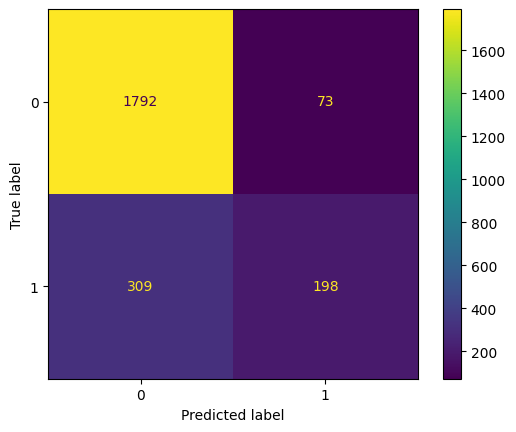

In [42]:
cm_train = confusion_matrix(y_train, y_pred_fin)
ConfusionMatrixDisplay(cm_train).plot()

pada data latihan, diketahui bahwa:
1. True Positif  : model yang telah saya buat mampu memprediksi 1792 nasabah yang tidak gagal bayar pada bulan depan dan nyatanya memang tidak gagal bayar pada bulan depan.
2. True Negatif  : model yang telah saya buat mampu memprediksi 198 nasabah yang gagal bayar pada bulan depan dan nyatanya memang gagal bayar pada bulan depan.
3. False Positif : model yang telah saya buat mampu memprediksi 73 nasabah yang tidak gagal bayar pada bulan depan namun nyatanya mereka gagal bayar pada bulan depan.
4. False Negatif : model yang telah saya buat mampu memprediksi 309 nasabah yang gagal bayar pada bulan depan namun nyatanya mereka tidak gagal bayar pada bulan depan.

## model dilakukan pada data tes

model terbaik yang didapat, diimplementasikan pada data tes.

In [43]:
SVC_best.score(X_test_final, y_test)

0.8381112984822934

mencari prediksi nilai output pada data test

In [44]:
y_pred_fin_test = SVC_best.predict(X_test_final)

membandingkan `classification report` pada data train dan data test

In [45]:
print('classification report on train set')
print(classification_report(y_train,y_pred_fin))
print('classification report on test set')
print(classification_report(y_test,y_pred_fin_test))

classification report on train set
              precision    recall  f1-score   support

           0       0.85      0.96      0.90      1865
           1       0.73      0.39      0.51       507

    accuracy                           0.84      2372
   macro avg       0.79      0.68      0.71      2372
weighted avg       0.83      0.84      0.82      2372

classification report on test set
              precision    recall  f1-score   support

           0       0.85      0.96      0.90       465
           1       0.73      0.40      0.52       128

    accuracy                           0.84       593
   macro avg       0.79      0.68      0.71       593
weighted avg       0.83      0.84      0.82       593



membuat confusion matrix pada data tes.

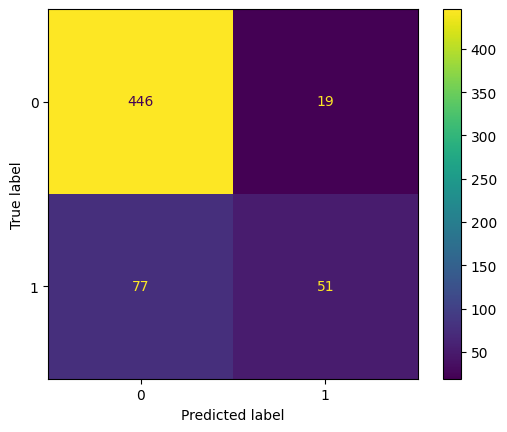

In [48]:
cm_test = confusion_matrix(y_test, y_pred_fin_test)
ConfusionMatrixDisplay(cm_test).plot()

setelah didapatkan parameter terbaik di model `SVC`, maka didapatkan nilai yang diuji pada data tes sebesar `0.8381112984822934` dengan jumlah true positif (memprediksi nasabah yang tidak gagal bayar pada bulan depan dan nyatanya memang tidak gagal bayar pada bulan depan) sebesar 446 nasabah dari total 593 nasabah.

# Model Inference

In [46]:
with open('SVC.pkl', 'wb') as file_1:
  pickle.dump(SVC_best, file_1)

with open('model_scaler.pkl', 'wb') as file_2:
  pickle.dump(scaler, file_2)

with open('model_encoder.pkl', 'wb') as file_3:
  pickle.dump(encoder, file_3)

with open('model_encoder_2.pkl', 'wb') as file_4:
  pickle.dump(encoder_2, file_4)

with open('list_num_cols.txt', 'w') as file_5:
  json.dump(X_num, file_5)

with open('list_cat_cols_OHE.txt','w') as file_6:
  json.dump(X_cat_OHE, file_6)

with open('list_cat_cols_OE.txt','w') as file_7:
  json.dump(X_cat_OE, file_7)

# Conceptual Problems

#### Apa yang dimaksud dengan criterion pada Decision Tree ? Jelaskan criterion yang kalian pakai dalam kasus ini !

criterion pada decision tree berfungsi untuk menentukan model mana yang paling baik pada dataset yang kita miliki.

pada model yang saya gunakan diatas, saya menggunakan grid cv untuk mencari mana yang paling baik pada dataset yang saya punya. didapatkan `absolute_error` merupakan model yang paling baik. `absolute_eror` itu sendiri merupakan metode kriteria yang berfungsi untuk mengukur besarnya kesalahan prediksi dengan menghitung selisih antara nilai aktual dan nilai prediksi dari target variable.

#### Jelaskan apa yang dimaksud dengan pruning pada Tree-based model (alasan, definisi, jenis, dll) !

pruning adalah teknik yang digunakan untuk mengurangi overfitting pada decision tree. hal ini dilakukan dengan cara memangkas bagian yang dirasa tidak berguna dalam penentuan hasil output. bila model terjadi overfitting maka, bila model dimasukkan kedalam data tes akan menghasilkan hasil yang sangat jauh berbeda. sehingga model kurang robnust dalam menentukan hasil. Penerapan pruning pada decision tree, dapat mengurangi outlier maupun noise data pada decision tree awal sehingga dapat meningkatkan akurasi pada klasifikasi  data (Han & Kamber 2006)

jenis prunning secara umum terbagi menjadi 2, yaitu pre-prunning dan post-pruning. pre-pruning dilakukan dengan cara menghentikan pembuatan tree sebelum mencapai tingkat dengan kompleksifitas yang telah ditetapkan, seperti memilih jumlah minumum data pada leaf, jumlah kedalama data, dsb. post-pruning dilakukan dengan cara menghapus bagian yang tidak berkontribusi pada pembentukan model. 

#### Bagaimana cara memilih K yang optimal pada KNN ?

cara menentukan K yang optimal dapat dilakukan dengan cara hypertuning secara manual, random, dan dengan grid search sehingga mendapatkan hasil yang terbaik. selain itu dapat dilakukan cross validation dengan dataset latihan dibagi menjadi k-fold sehingga hasil akhir pada model yang diciptakan lebih robust.

#### Jelaskan apa yang dimaksud dengan Cross Validation !

cross validation adalah sebuah metode evaluasi model pada machine learning yang digunakan untuk menguji performa model yang telah kita buat. sehingga ketika dilakukan ke data uji akan mendapatkan hasil yang lebih robust. terdapat beberapa teknik dalam cross validation, antara lain: 

    1. K-Fold
    2. Leave One Out (LOOCV)
    3. Leave P Out (LPOCV)
    4. Stratified Cross Validation

    1. K-fold dilakukan dengan membagi data latihan menjadi beberapa bagian kemudian diulang sampai nilai yang telah ditentukan. pada setiap looping, data latihan akan dipecah menjadi 2 bagian, bagian pertama untuk belajar dan bagian kedua untuk validasi model yang telah dibentuk.`

    2. Leave One Out (LOOCV) dilakukan dengan menghilangkan satu bagian data latihan guna dijadikan nilai validasi. hal ini dilakukan terus sampai semua data latihan berhasil di looping dan kemudian didapatkan hasil yang lebih robust.

    3. Stratified Cross Validation dilakukan pada dataset yang tidak seimbang. sehingga pada setiap kali pengulangan data latihan yang digunakan memiliki proporsi yang sama.

#### Apa yang dimaksud dengan metrics-metrics berikut : Accuracy, Precision, Recall, F1 Score, dan kapan waktu yang tepat untuk menggunakannya ?

1. accuracy adalah salah satu cara untuk mengevaluasi model pada machine learning. accuracy dilakukan dengan cara mengukur ketepatan model dalam menentukan kelas. hal ini didapatkan dengan menghitung (`true positif` + `true negatif`) : (`true positif` + `true negatif` + `false positif` + `false negatif`).

2. precision adalah salah satu cara untuk mengevaluasi model pada machine learning. precision dilakukan dengan mengukur seberapa akurat model dalam mengidentifikasi kelas positif.
precision didapatkan dengan cara `true positif` : (`true positif` + `false positif`)

3. recall adalah salah satu cara untuk mengevaluasi model pada machine learning. recall dilakukan dengan mengukur seberapa baik suatu model dapat mengindentifikasi semua kasus positif. recall didapatkan dengan cara `true positif` : (`true positif` + `false negatif`)

4. f1 score adalah salah satu cara untuk mengevaluasi model pada machine learning. f1 score dilakukan untuk memberikan gambaran secara keseluruhan akan kinerja model yang telah dibuat. f1 score didapatkan dengan cara 2 * (`precision` * `recall`) : (`precision`+ `recall`)

# Kesimpulan

dengan uji yang telah dilakukan, ternyata terdapat beberapa data yang memiliki `outlier` tetapi `outlier` pada data diatas merupakan `natural outlier` yang tidak perlu dilakukan pembersihan maupun manipulasi. dengan literasi yang menunjukkan bahwa terdapat beberapa cara untuk mengecek apakah nasabah akan gagal bayar atau tidak, dilihat dari `credit score`. terdapat 2330 nasabah yang masih tidak dikategorikan sebagai nasabah `gagal bayar` pada bulan berikutnya. dilakukan pengerjaan model untuk menentukan kategori `default_payment_next_month` dengan model `logistik regresi, KNN, Naive Bayes, Tree regressor, random forest, SVM.SVC, dan Multi-layer Perceptron`. dengan model `SVM.SVC` yang saya gunakan mempunyai nilai terbaik berdasarkan rata-rata `f1 score` dan kemudian saya coba *tuning* model SVM hyperparameter terbaiknya yaitu `'C': 1, 'gamma': 'scale', 'kernel': 'rbf'` dengan total nilai skor sebesar 83,81%. untuk memperbaiki nilai scoring pada model, dapat dilakukan perbaikan pada data yang diperoleh agar datanya lebih seimbang, atau dilakukan `undersampling` pada data diatas.

# reference

Han J, Kamber M. 2006. Data Mining: Concepts and Techniques. Ed ke-2. USA: Academic Press.